In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.patches as mpatches
import seaborn as sns
import ast

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('P2X_Models_Metrics.csv')

# Display the first few rows of the DataFrame
df.head()

,iptm,ptm,ranking_score,fraction_disordered,has_clash,num_recycles,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,first_subunit,second_subunit,third_subunit,structure_type
0,0.71,0.75,0.74,0.04,0.0,10.0,"[0.43, 0.43, 0.43, 0.05, 0.04, 0.05, 0.04, 0.0...","[[0.81, 0.79, 0.79, 0.66, 0.6, 0.64, 0.55, 0.4...","[[0.76, 2.55, 2.55, 5.33, 5.75, 5.57, 7.08, 7....","[0.81, 0.81, 0.81, 0.04, 0.04, 0.04, 0.04, 0.0...",p2x6,p2x6,p2x6,trimmed
1,0.65,0.70,0.69,0.06,0.0,10.0,"[0.36, 0.36, 0.38, 0.04, 0.04, 0.04, 0.04, 0.0...","[[0.79, 0.68, 0.7, 0.64, 0.52, 0.51, 0.55, 0.5...","[[0.76, 3.65, 3.27, 5.94, 7.93, 8.45, 7.64, 8....","[0.79, 0.78, 0.78, 0.04, 0.04, 0.04, 0.04, 0.0...",p2x4,p2x4,p2x7,trimmed
2,0.64,0.68,0.68,0.06,0.0,10.0,"[0.36, 0.36, 0.35, 0.04, 0.04, 0.04, 0.04, 0.0...","[[0.77, 0.67, 0.65, 0.61, 0.49, 0.5, 0.47, 0.4...","[[0.76, 4.16, 3.8, 6.25, 9.02, 8.52, 8.76, 8.4...","[0.77, 0.78, 0.75, 0.04, 0.04, 0.05, 0.04, 0.0...",p2x1,p2x1,p2x5,trimmed
3,0.66,0.70,0.70,0.06,0.0,10.0,"[0.37, 0.37, 0.37, 0.04, 0.04, 0.04, 0.04, 0.0...","[[0.81, 0.71, 0.69, 0.6, 0.47, 0.47, 0.43, 0.4...","[[0.76, 3.14, 3.4, 6.0, 8.61, 8.81, 9.47, 8.68...","[0.81, 0.81, 0.76, 0.04, 0.04, 0.04, 0.04, 0.0...",p2x3,p2x3,p2x6,trimmed
4,0.68,0.72,0.72,0.05,0.0,10.0,"[0.37, 0.41, 0.4, 0.04, 0.04, 0.04, 0.04, 0.04...","[[0.75, 0.73, 0.71, 0.53, 0.61, 0.5, 0.5, 0.54...","[[0.76, 2.99, 3.56, 8.09, 5.71, 7.83, 8.33, 7....","[0.75, 0.78, 0.78, 0.04, 0.04, 0.04, 0.04, 0.0...",p2x1,p2x7,p2x7,trimmed


In [3]:
# Summary statistics for numerical columns
summary_stats = df.describe()
summary_stats

,iptm,ptm,ranking_score,fraction_disordered,has_clash,num_recycles
count,84.000000,84.000000,84.000000,84.000000,84.0,84.0
mean,0.669167,0.711429,0.707857,0.059524,0.0,10.0
std,0.030546,0.026396,0.028794,0.007097,0.0,0.0
min,0.620000,0.670000,0.660000,0.040000,0.0,10.0
25%,0.650000,0.697500,0.690000,0.060000,0.0,10.0
50%,0.670000,0.710000,0.710000,0.060000,0.0,10.0
75%,0.680000,0.720000,0.720000,0.060000,0.0,10.0
max,0.770000,0.790000,0.800000,0.070000,0.0,10.0


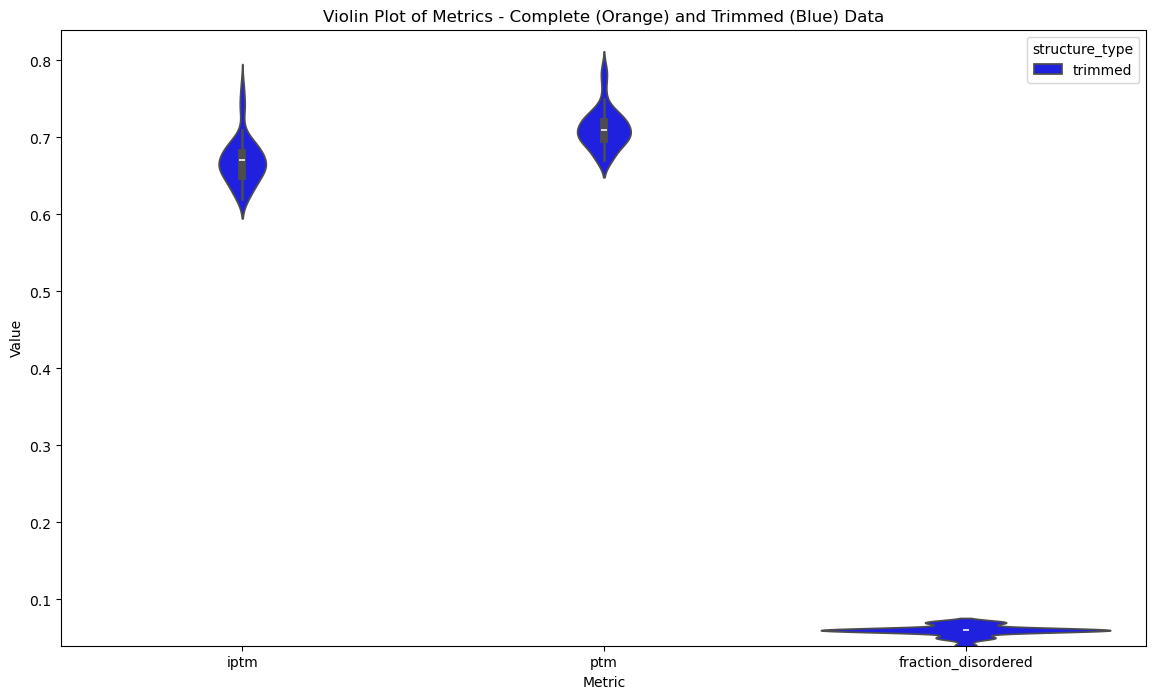

In [4]:
# Convert string representations of lists into actual lists
for col in ['chain_iptm', 'chain_pair_iptm', 'chain_pair_pae_min', 'chain_ptm']:
    df[col] = df[col].apply(ast.literal_eval)

# Select metrics for plotting
metrics = ['iptm', 'ptm', 'fraction_disordered']

# Melt the dataframe
melted = df.melt(id_vars=['structure_type'], value_vars=metrics, var_name='Metric', value_name='Value')

# Determine the y-axis range
y_min = melted['Value'].min()
y_max = melted['Value'].max()+0.05

# Create violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Metric', y='Value', hue='structure_type', data=melted, palette={'complete': 'orange', 'trimmed': 'blue'})
plt.ylim(y_min, y_max)
plt.title('Violin Plot of Metrics - Complete (Orange) and Trimmed (Blue) Data')
plt.show()

/home/bmsas1/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


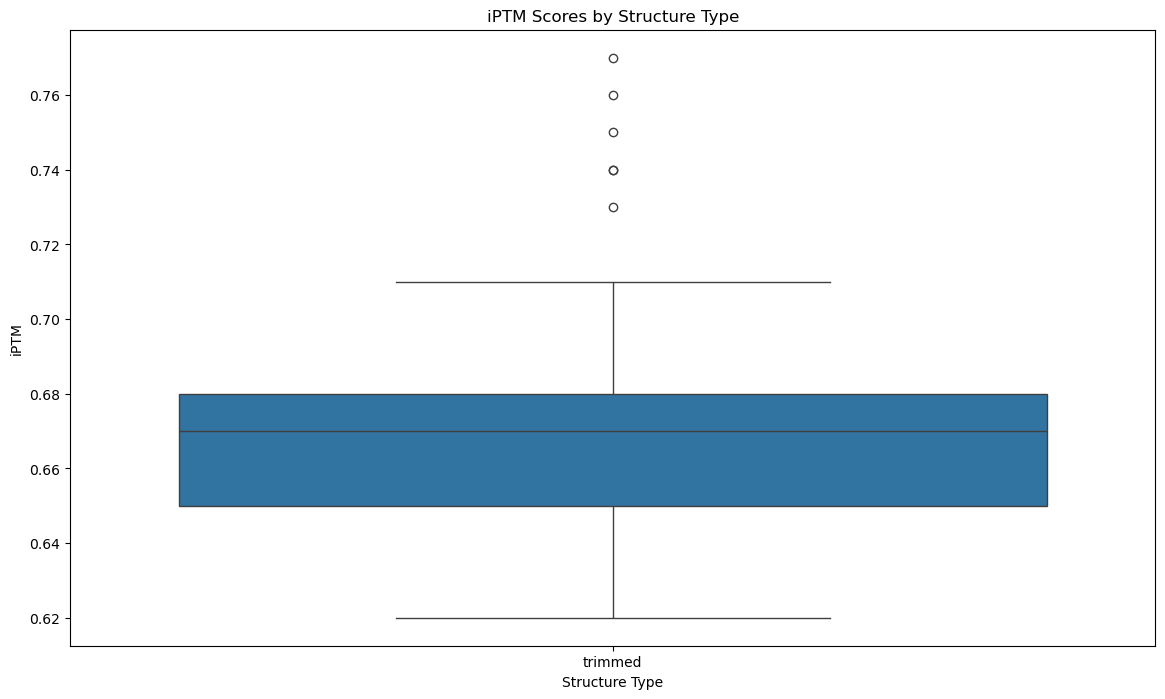

/home/bmsas1/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


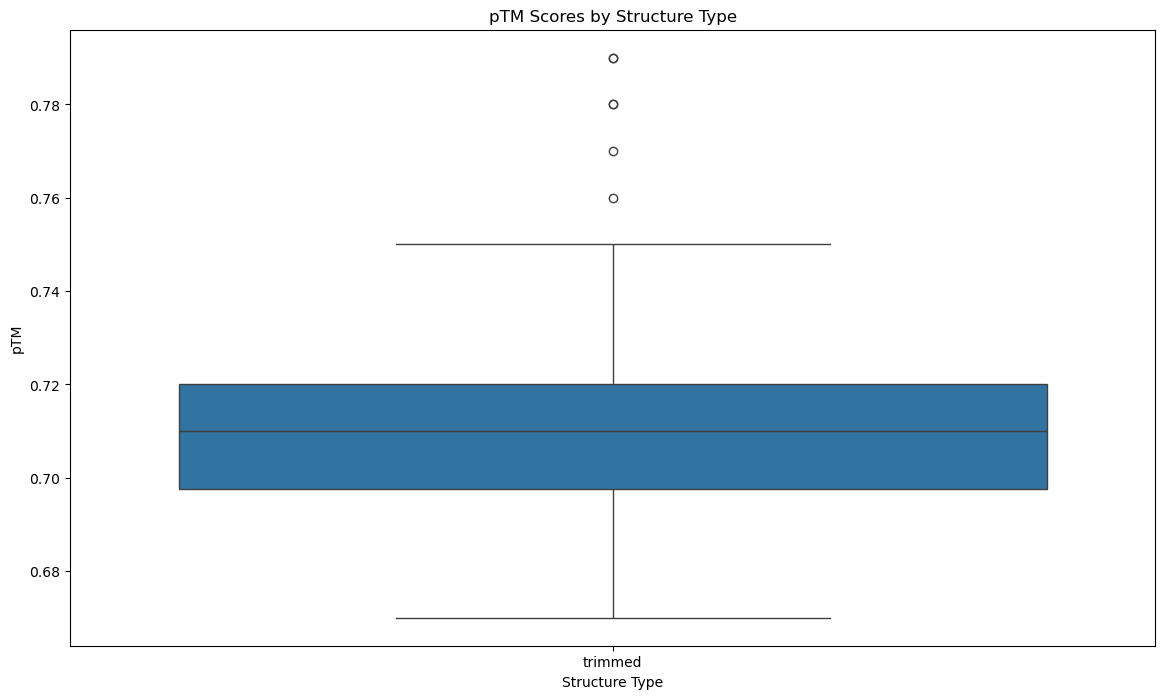

In [5]:
# Boxplots for comparing metrics across subunits and structure types
plt.figure(figsize=(14, 8))
sns.boxplot(x='structure_type', y='iptm', data=df)
plt.title('iPTM Scores by Structure Type')
plt.xlabel('Structure Type')
plt.ylabel('iPTM')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='structure_type', y='ptm', data=df)
plt.title('pTM Scores by Structure Type')
plt.xlabel('Structure Type')
plt.ylabel('pTM')
plt.show()

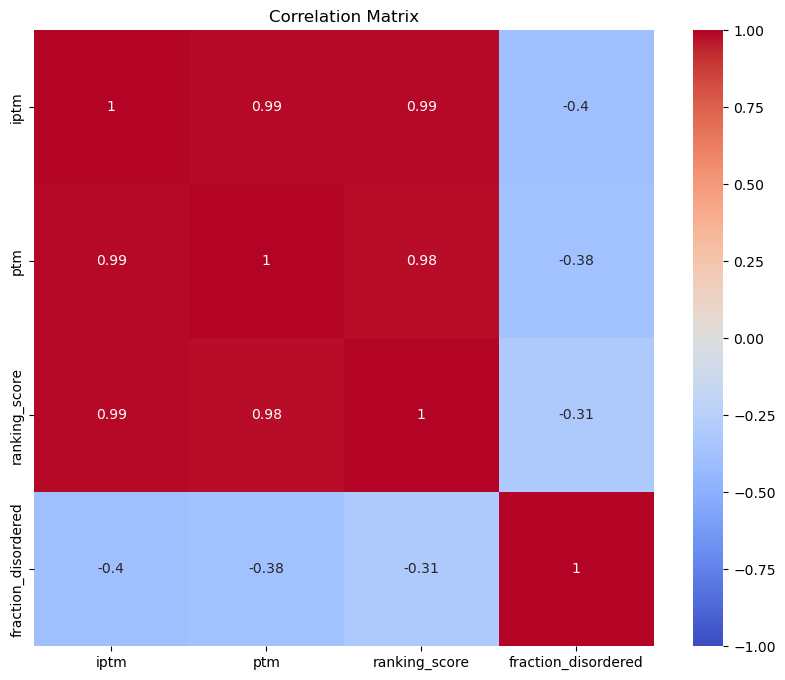

In [6]:
# Compute the correlation matrix
corr_matrix = df[['iptm', 'ptm', 'ranking_score', 'fraction_disordered']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


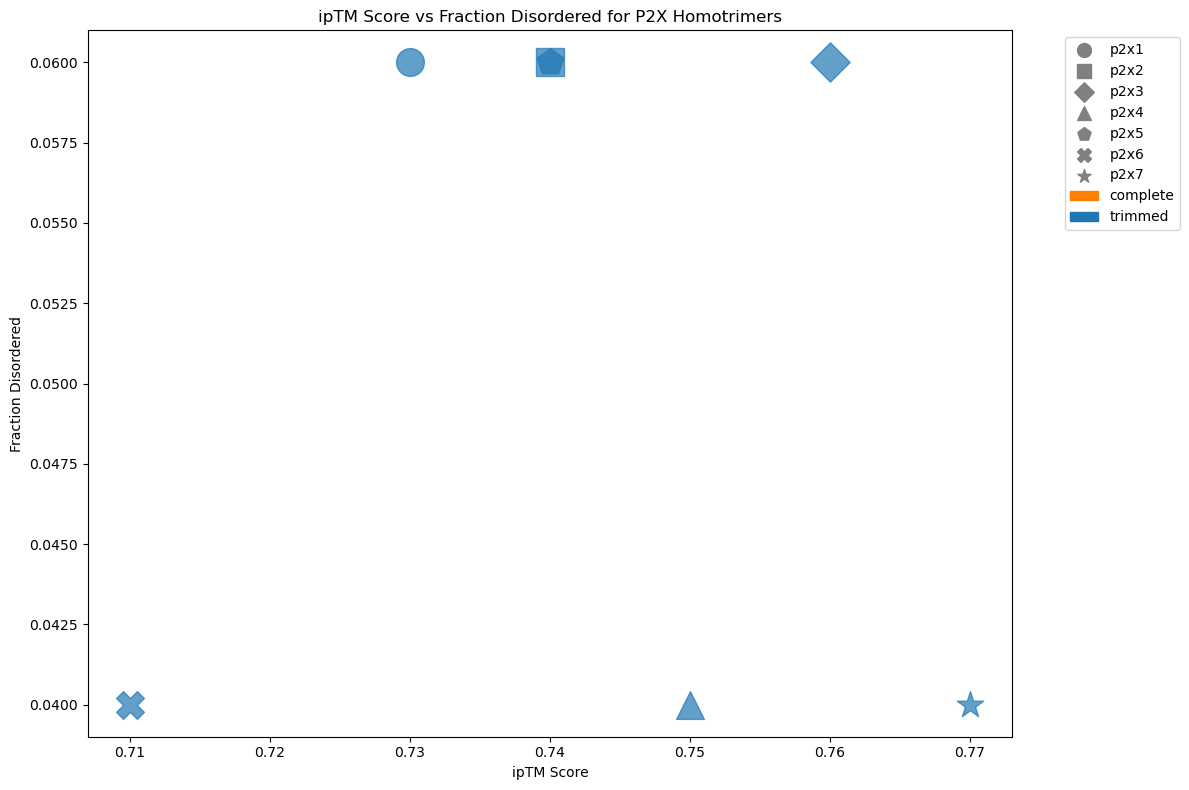

In [7]:
# Filter for homotrimers
homotrimers = df[(df['first_subunit'] == df['second_subunit']) & 
                 (df['second_subunit'] == df['third_subunit'])]

# Define shapes, colors, and marker sizes for each P2X subtype and structure type
shapes = {'p2x1': 'o', 'p2x2': 's', 'p2x3': 'D', 'p2x4': '^', 
          'p2x5': 'p', 'p2x6': 'X', 'p2x7': '*'}
colors = {'complete': '#ff7f00', 'trimmed': '#1f78b4'}
marker_sizes = {'complete': 400, 'trimmed': 400}

plt.figure(figsize=(12, 8))

# Plot the data points without labels
for subunit in shapes.keys():
    for structure in colors.keys():
        data = homotrimers[(homotrimers['first_subunit'] == subunit) & 
                           (homotrimers['structure_type'] == structure)]
        plt.scatter(data['iptm'], data['fraction_disordered'], 
                    marker=shapes[subunit], c=colors[structure], 
                    s=marker_sizes[structure], alpha=0.7)

# Create custom legend handles
shape_handles = [plt.scatter([], [], marker=shape, color='gray', s=100, label=subunit) 
                 for subunit, shape in shapes.items()]
color_handles = [mpatches.Patch(color=color, label=structure) 
                 for structure, color in colors.items()]

# Combine handles and labels
all_handles = shape_handles + color_handles
all_labels = list(shapes.keys()) + list(colors.keys())

plt.title('ipTM Score vs Fraction Disordered for P2X Homotrimers')
plt.xlabel('ipTM Score')
plt.ylabel('Fraction Disordered')

# Create the legend
plt.legend(handles=all_handles, labels=all_labels, 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter the Data
# Only include rows with heterotrimeric combinations (e.g., P2X1, P2X2, P2X1)
heterotrimers = df[
    (df['first_subunit'] == df['second_subunit']) | 
    (df['second_subunit'] == df['third_subunit']) | 
    (df['first_subunit'] == df['third_subunit'])
]

# Exclude combinations with three different subunits
heterotrimers = heterotrimers[
    (heterotrimers['first_subunit'] == heterotrimers['second_subunit']) |
    (heterotrimers['second_subunit'] == heterotrimers['third_subunit'])
]

# Separate the data into 'complete' and 'trimmed' subsets
complete_data = heterotrimers[heterotrimers['structure_type'] == 'complete']
trimmed_data = heterotrimers[heterotrimers['structure_type'] == 'trimmed']

# Function to create and plot correlation matrix
def plot_correlation_matrix(data, metric, structure_type):
    data['pair_label'] = data.apply(
        lambda row: f"({row['first_subunit']})₂" if row['first_subunit'] == row['second_subunit'] else f"({row['second_subunit']})₂",
        axis=1
    )
    data['single_label'] = data.apply(
        lambda row: f"({row['third_subunit']})₁" if row['first_subunit'] == row['second_subunit'] else f"({row['first_subunit']})₁",
        axis=1
    )
    
    correlation_data = data.pivot_table(
        index='single_label', 
        columns='pair_label', 
        values=metric,
        aggfunc='mean'
    )
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix of {structure_type.capitalize()} Heterotrimeric P2X Receptors - {metric}')
    plt.show()

# Metrics to plot
metrics = ['iptm', 'ptm', 'ranking_score', 'fraction_disordered']

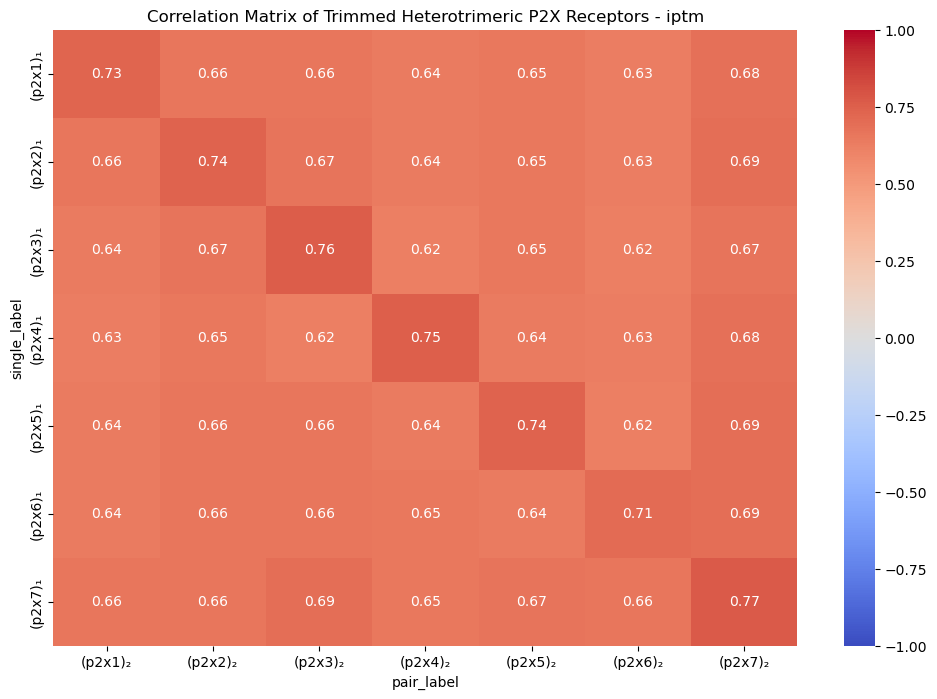

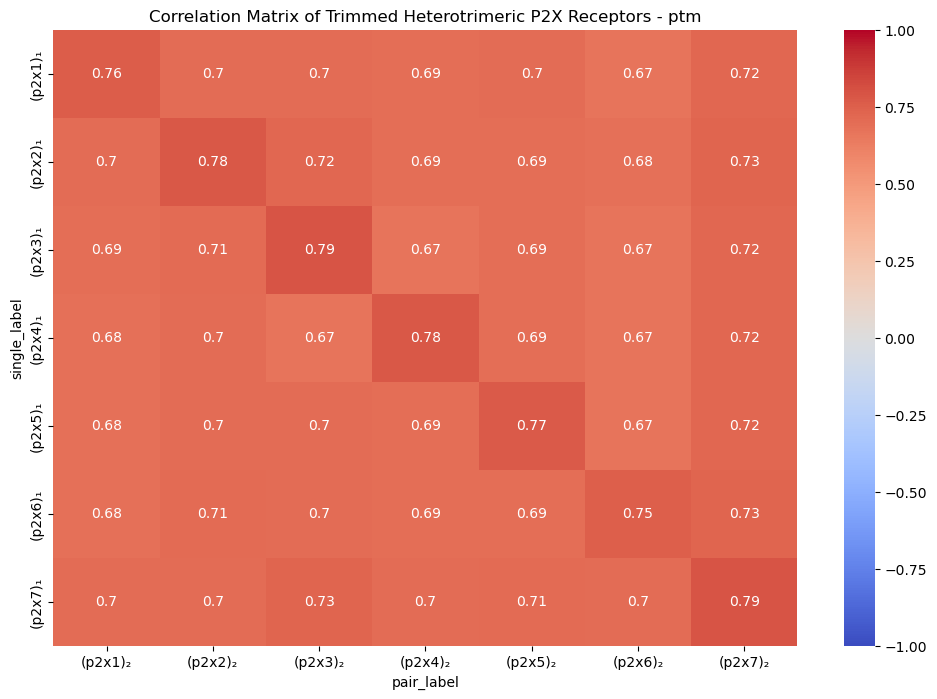

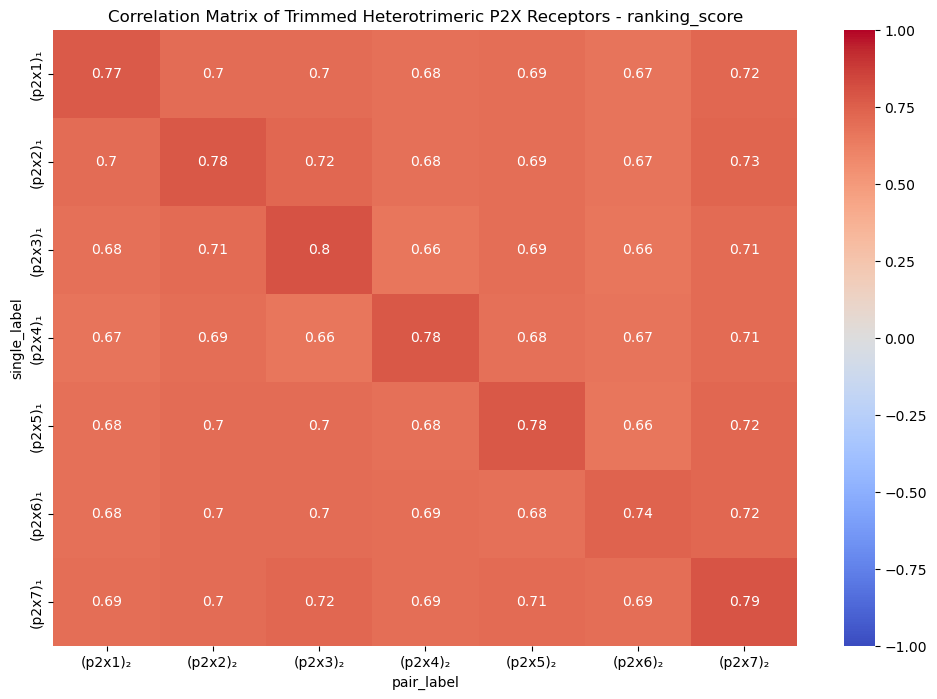

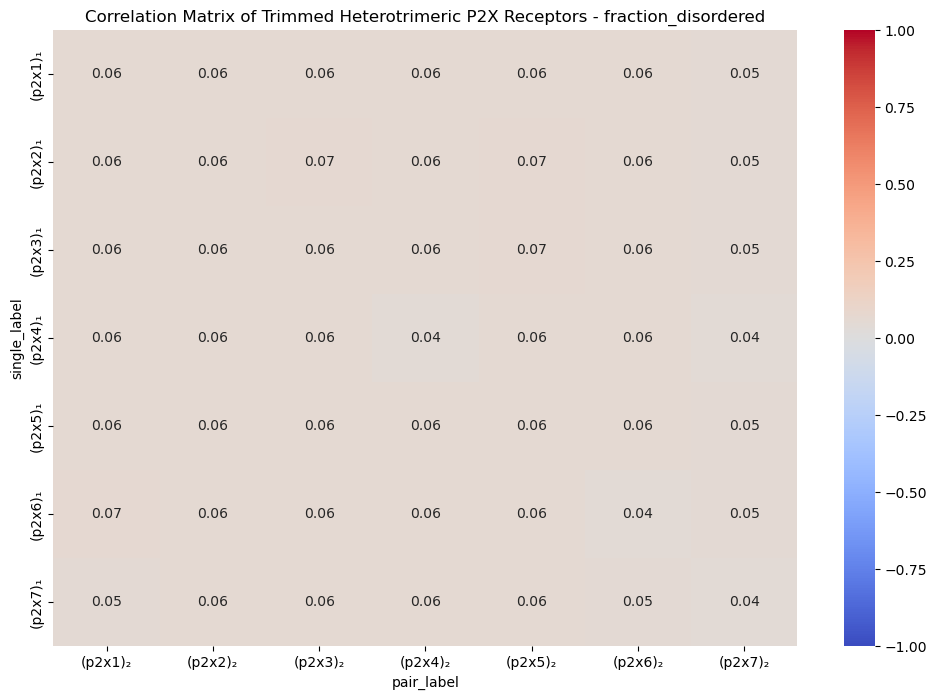

In [9]:
# Plot for 'trimmed' data
for metric in metrics:
    plot_correlation_matrix(trimmed_data, metric, 'trimmed')


/tmp/ipykernel_111352/935741864.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='iptm', y='combination', data=data, palette='viridis')
/home/bmsas1/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/bmsas1/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/bmsas1/miniconda3/lib/python3.11/site-packages/seaborn/_ba

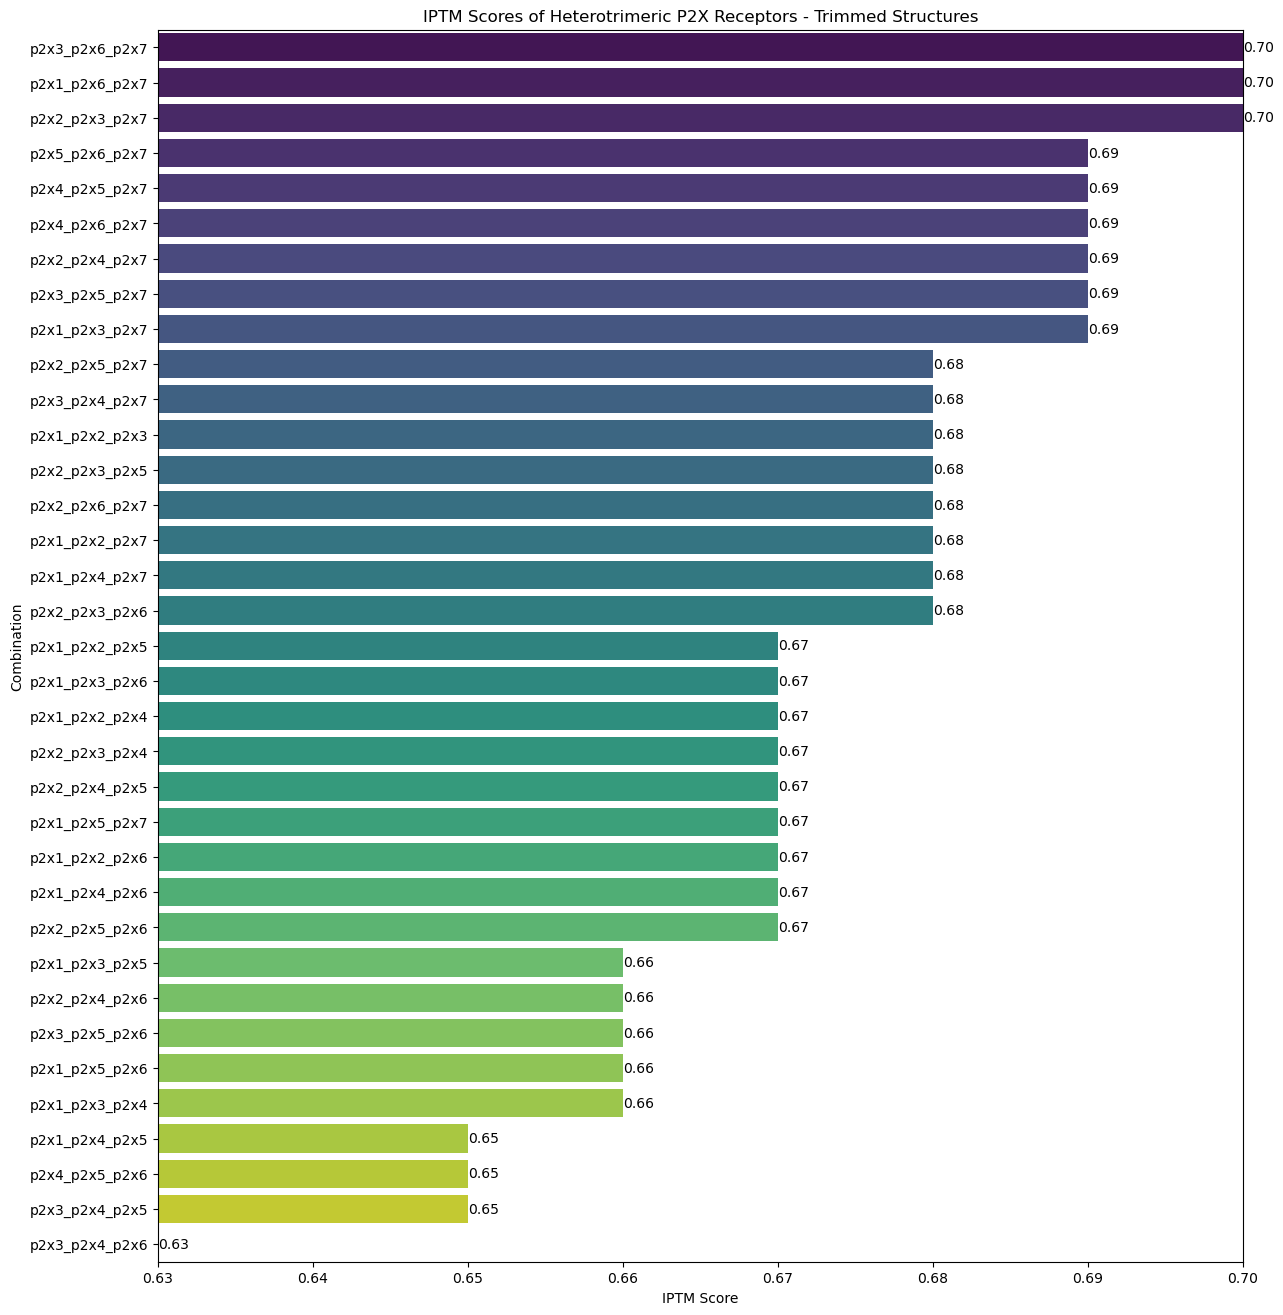

In [10]:
# Function to create labels for combinations
def create_combination_label(row):
    return f"{row['first_subunit']}_{row['second_subunit']}_{row['third_subunit']}"

# Filter data for complete and trimmed structures
complete_data = df[df['structure_type'] == 'complete']
trimmed_data = df[df['structure_type'] == 'trimmed']

# Add combination labels
complete_data['combination'] = complete_data.apply(create_combination_label, axis=1)
trimmed_data['combination'] = trimmed_data.apply(create_combination_label, axis=1)

# Function to filter data to only include combinations with three different subunits
def filter_heterotrimers(data):
    return data[(data['first_subunit'] != data['second_subunit']) & 
                (data['first_subunit'] != data['third_subunit']) & 
                (data['second_subunit'] != data['third_subunit'])]

# Filtered data
filtered_complete_data = filter_heterotrimers(complete_data)
filtered_trimmed_data = filter_heterotrimers(trimmed_data)

# Sorting data by iptm score from highest to lowest
filtered_complete_data = filtered_complete_data.sort_values(by='iptm', ascending=False)
filtered_trimmed_data = filtered_trimmed_data.sort_values(by='iptm', ascending=False)

# Plotting function
def plot_iptm_scores(data, structure_type):
    plt.figure(figsize=(14, 16))  # Increase the height of the plot
    ax = sns.barplot(x='iptm', y='combination', data=data, palette='viridis')
    plt.title(f'IPTM Scores of Heterotrimeric P2X Receptors - {structure_type.capitalize()} Structures')
    plt.xlabel('IPTM Score')
    plt.ylabel('Combination')
    
    # Set the x-axis limits to the min and max of the data
    min_iptm = data['iptm'].min()
    max_iptm = data['iptm'].max()
    plt.xlim(min_iptm, max_iptm)
    
    # Add labels to each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')
    
    plt.show()

# Plot iptm scores for trimmed structures
plot_iptm_scores(filtered_trimmed_data, 'trimmed')

   iptm   ptm  ranking_score  fraction_disordered  has_clash  num_recycles  \
0  0.71  0.75           0.74                 0.04        0.0          10.0   
1  0.65  0.70           0.69                 0.06        0.0          10.0   
2  0.64  0.68           0.68                 0.06        0.0          10.0   
3  0.66  0.70           0.70                 0.06        0.0          10.0   
4  0.68  0.72           0.72                 0.05        0.0          10.0   

                                          chain_iptm  \
0  [0.43, 0.43, 0.43, 0.05, 0.04, 0.05, 0.04, 0.0...   
1  [0.36, 0.36, 0.38, 0.04, 0.04, 0.04, 0.04, 0.0...   
2  [0.36, 0.36, 0.35, 0.04, 0.04, 0.04, 0.04, 0.0...   
3  [0.37, 0.37, 0.37, 0.04, 0.04, 0.04, 0.04, 0.0...   
4  [0.37, 0.41, 0.4, 0.04, 0.04, 0.04, 0.04, 0.04...   

                                     chain_pair_iptm  \
0  [[0.81, 0.79, 0.79, 0.66, 0.6, 0.64, 0.55, 0.4...   
1  [[0.79, 0.68, 0.7, 0.64, 0.52, 0.51, 0.55, 0.5...   
2  [[0.77, 0.67, 0.65, 0.6

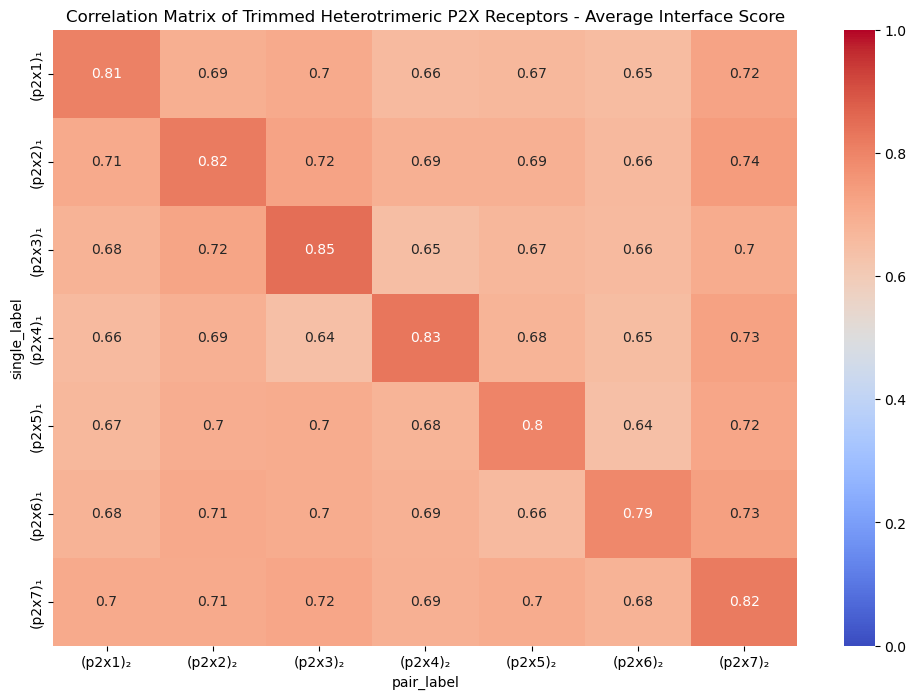

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the CSV file into a DataFrame
df = pd.read_csv('P2X_Models_Metrics.csv')

# Convert the string representations of lists in the DataFrame to actual lists
df['chain_pair_iptm'] = df['chain_pair_iptm'].apply(ast.literal_eval)

# Only include rows with heterotrimeric combinations (e.g., P2X1, P2X2, P2X1)
heterotrimers = df[
    (df['first_subunit'] == df['second_subunit']) | 
    (df['second_subunit'] == df['third_subunit']) | 
    (df['first_subunit'] == df['third_subunit'])
]

# Exclude combinations with three different subunits
heterotrimers = heterotrimers[
    (heterotrimers['first_subunit'] == heterotrimers['second_subunit']) |
    (heterotrimers['second_subunit'] == heterotrimers['third_subunit'])
]

# Function to extract interface scores
def calculate_interface_scores(row):
    scores = [row['chain_pair_iptm'][0][1], row['chain_pair_iptm'][0][2], row['chain_pair_iptm'][1][2]]
    return scores

# Function to calculate the average of interface scores
def calculate_average_interface_score(scores):
    return sum(scores) / len(scores)

# Apply the function to extract interface scores
heterotrimers['interface_scores'] = heterotrimers.apply(calculate_interface_scores, axis=1)

# Calculate the average interface score
heterotrimers['average_interface_score'] = heterotrimers['interface_scores'].apply(calculate_average_interface_score)

# Check if the columns are added correctly
print(heterotrimers.head())

# Separate the data into 'complete' and 'trimmed' subsets
complete_data = heterotrimers[heterotrimers['structure_type'] == 'complete']
trimmed_data = heterotrimers[heterotrimers['structure_type'] == 'trimmed']

# Check if the columns exist after filtering
print(trimmed_data.head())

# Function to create and plot correlation matrix for the average interface score
def plot_correlation_matrix(data, structure_type):
    data['pair_label'] = data.apply(
        lambda row: f"({row['first_subunit']})₂" if row['first_subunit'] == row['second_subunit'] else f"({row['second_subunit']})₂",
        axis=1
    )
    data['single_label'] = data.apply(
        lambda row: f"({row['third_subunit']})₁" if row['first_subunit'] == row['second_subunit'] else f"({row['first_subunit']})₁",
        axis=1
    )
    
    correlation_data = data.pivot_table(
        index='single_label', 
        columns='pair_label', 
        values='average_interface_score',
        aggfunc='mean'
    )
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title(f'Correlation Matrix of {structure_type.capitalize()} Heterotrimeric P2X Receptors - Average Interface Score')
    plt.show()

# Plot for 'trimmed' data
plot_correlation_matrix(trimmed_data, 'trimmed')
